# Lab 2: ggplot and dplyr




In [1]:
library(tidyverse)
install.packages('palmerpenguins')
install.packages('nycflights13')
library(palmerpenguins)
library(nycflights13)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Introducing ggplot

Every ggplot2 plot has three key components:

- data,

- A set of aesthetic mappings between variables in the data and visual properties, and

- At least one layer which describes how to render each observation. Layers are usually created with a geom function.

(Source: https://ggplot2-book.org/getting-started.html)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


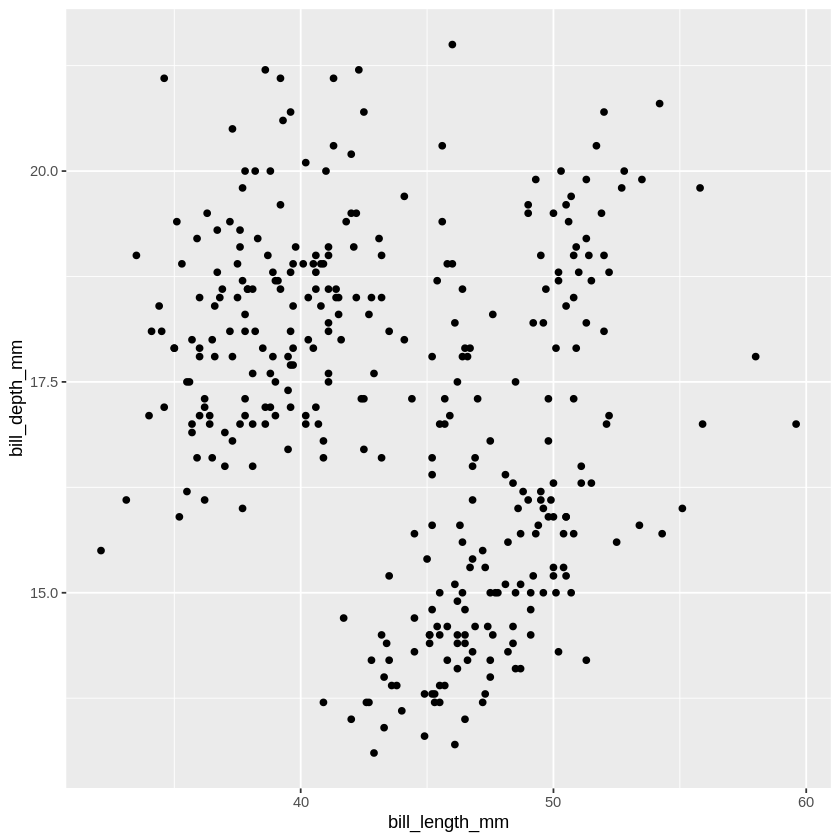

In [2]:
# The first basic scatter plot
ggplot(
    data = penguins, 
    mapping = aes(x = bill_length_mm, y = bill_depth_mm)
) +
  geom_point() # continue code on a new line with "+" operator

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


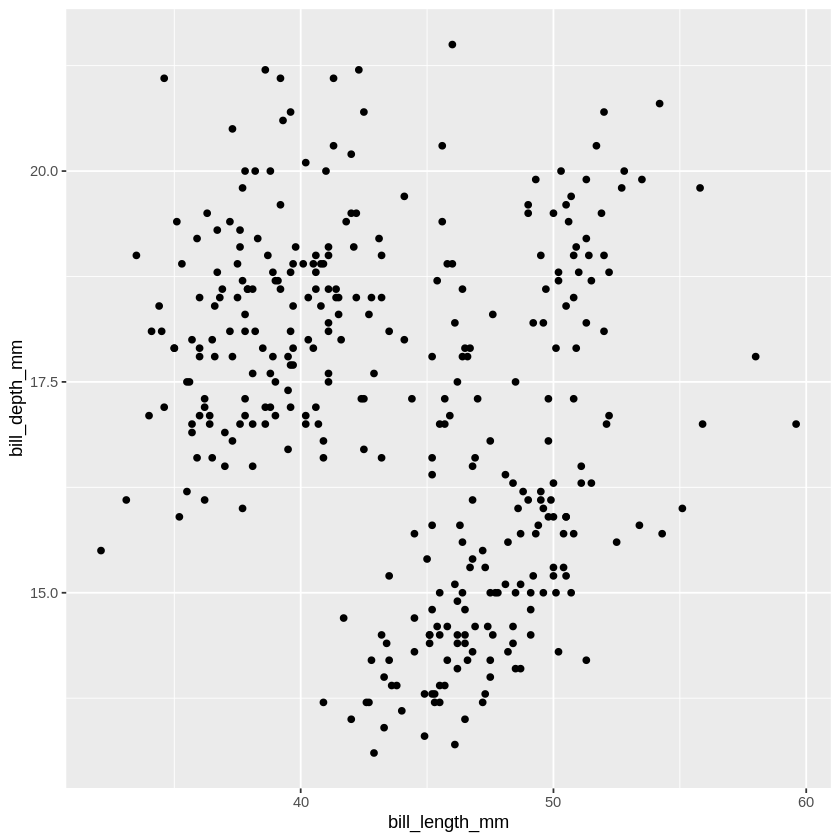

In [3]:
# An equivalent way of plotting the above
ggplot(data = penguins) +
    geom_point(aes(x = bill_length_mm, y = bill_depth_mm))

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


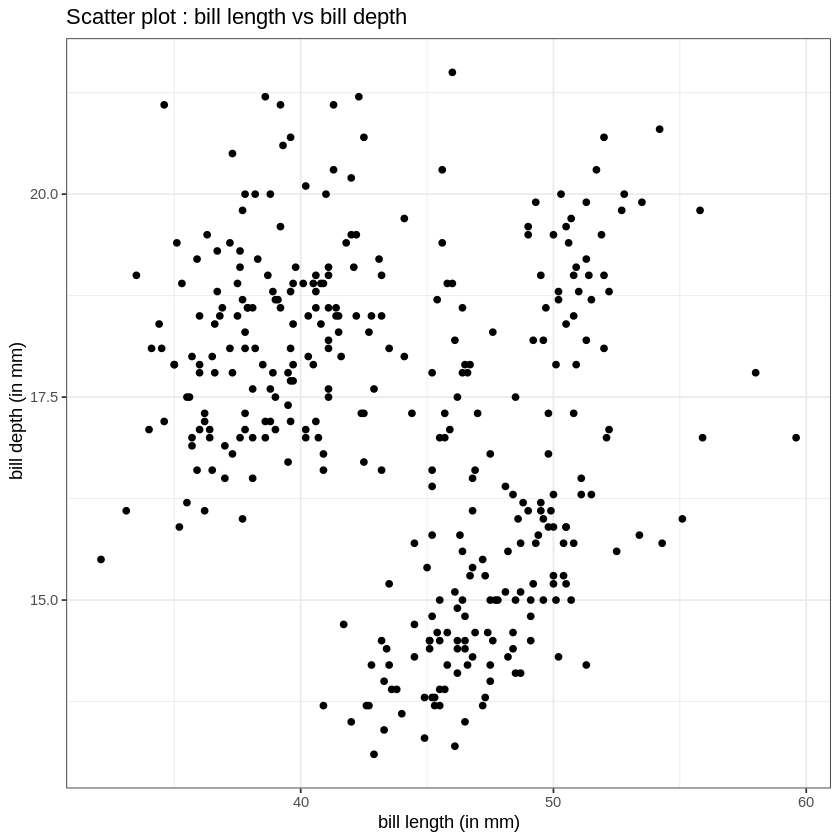

In [10]:
#  A more professionally formatted plot
ggplot(data = penguins) +
    geom_point(aes(x = bill_length_mm, y = bill_depth_mm)) +
    labs(x = 'bill length (in mm)', 
           y =' bill depth (in mm)',
           title = 'Scatter plot : bill length vs bill depth' 
          ) + 
            theme_bw()  # add a theme layer

### Layering Geometric Objects

Suppose we are interested in identifying trends in our data. We can plot a smooth line of best fit as follows.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


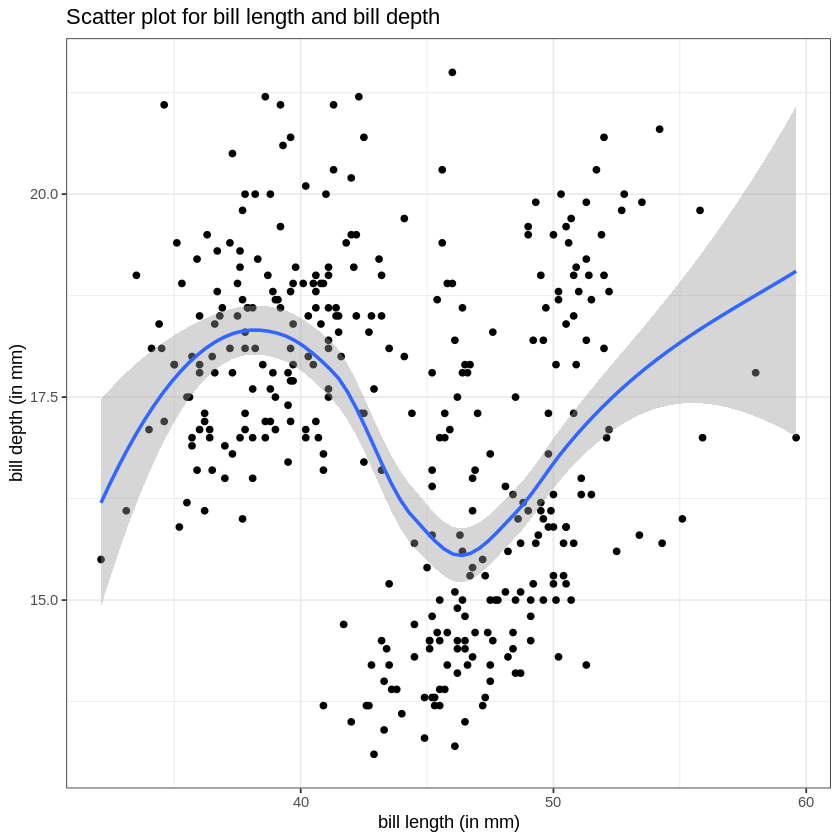

In [11]:
ggplot(
    data = penguins, 
    mapping = aes(x = bill_length_mm, y = bill_depth_mm)) +
    geom_point() +
    geom_smooth() + # add a second smoothing line
    labs(x = 'bill length (in mm)', y = 'bill depth (in mm)'
        ) +
    ggtitle('Scatter plot for bill length and bill depth') + # notice how we added title differently now
    theme_bw()

### **Exercise 1**

Make a scatterplot of bill_depth_mm vs. bill_length_mm and color the points by species. What does adding coloring by species reveal about the relationship between these two variables?

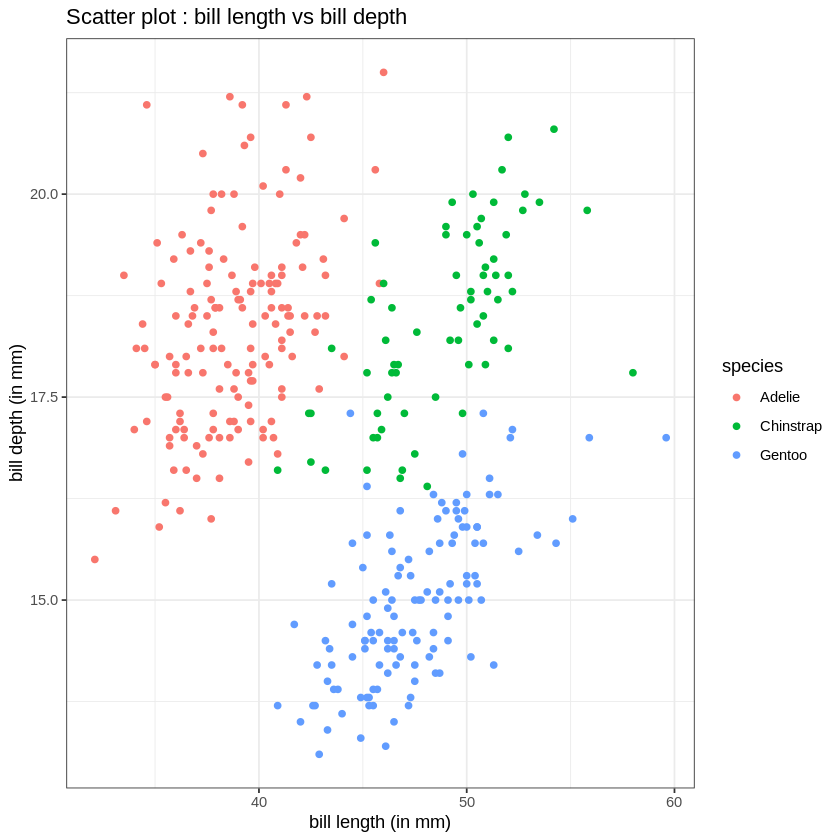

In [ ]:
#@title Answer to exercise 1

ggplot(
    data = penguins) +
    geom_point(
        aes(
            x = bill_length_mm, 
            y = bill_depth_mm,  
            color = species)
    ) +
labs(
    x = 'bill length (in mm)', 
    y = 'bill depth (in mm)'
) +
    ggtitle('Scatter plot : bill length vs bill depth') +
    theme_bw()

# The below illustration suggests that we can classify penguins' species by their
# combination of bill length and bill depth

### Bar plots, histograms and box plots with ggplot

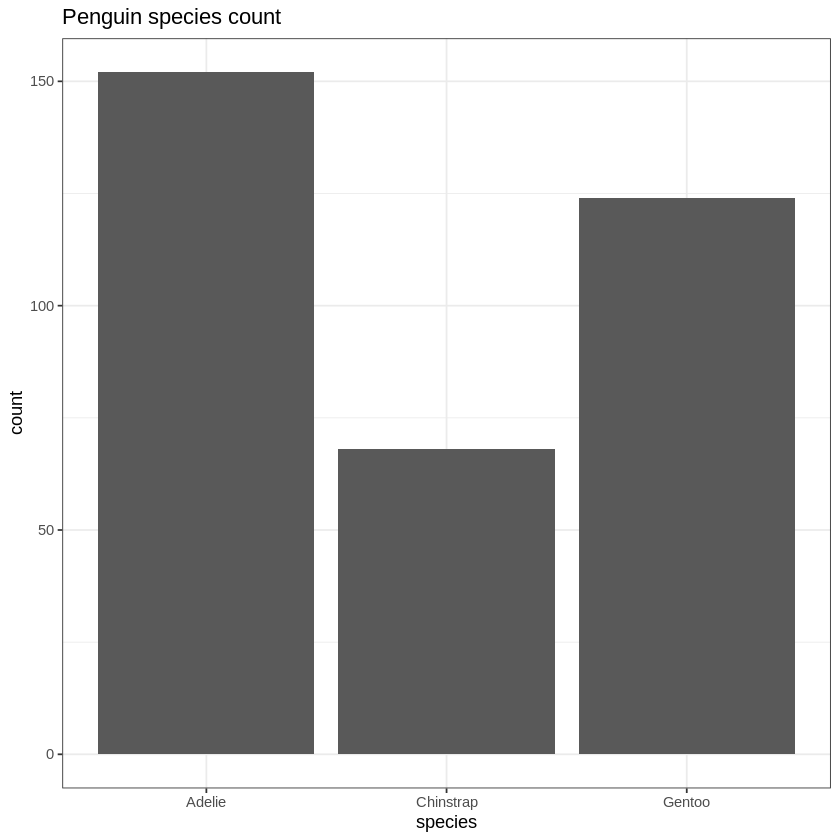

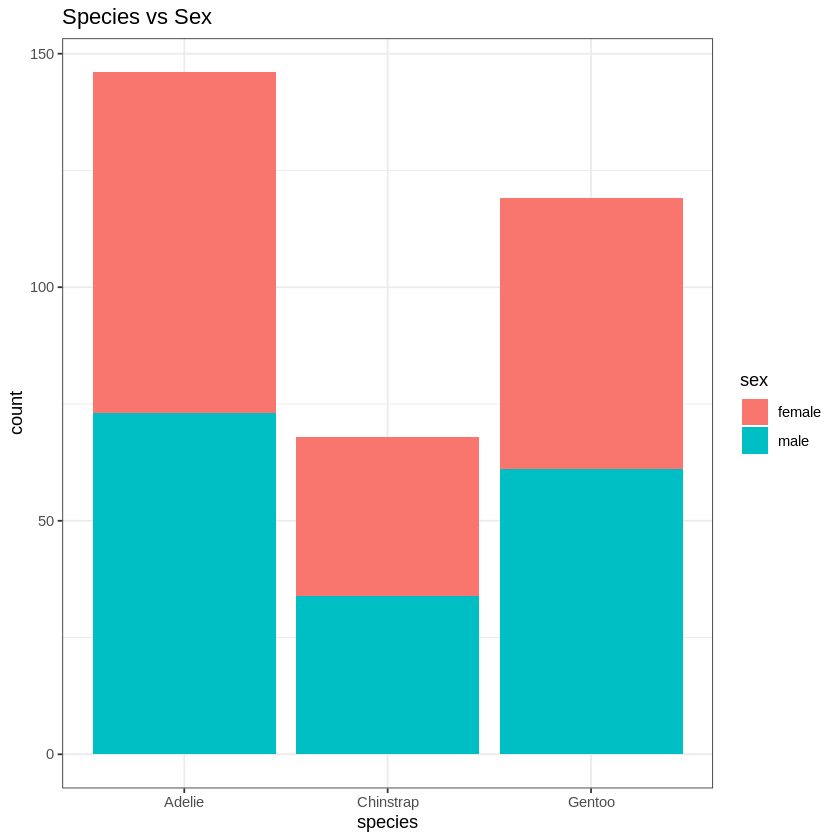

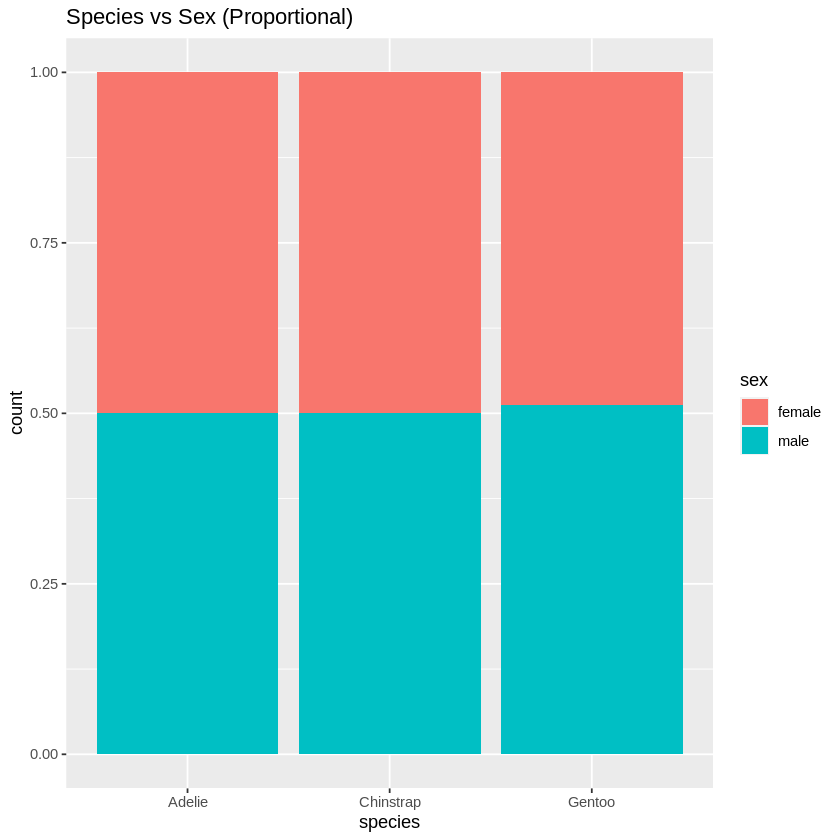

In [ ]:
# bar plot for  penguin species' counts
ggplot(penguins, aes(x = species)) +
  geom_bar() +
  ggtitle('Penguin species count') +
  theme_bw()

penguins_nona <- penguins %>% na.omit() # dropping rows with missing values

# using bar plot to visualise the relationship between species and sex
ggplot(penguins_nona, aes(x = species, fill = sex)) +
  geom_bar() +
  ggtitle('Species vs Sex') +
  theme_bw()

# using proportional bar plot to visualise the relationship between species and sex
ggplot(penguins_nona, aes(x = species, fill = sex)) +
  ggtitle('Species vs Sex (Proportional) ') +
  geom_bar(position = "fill")

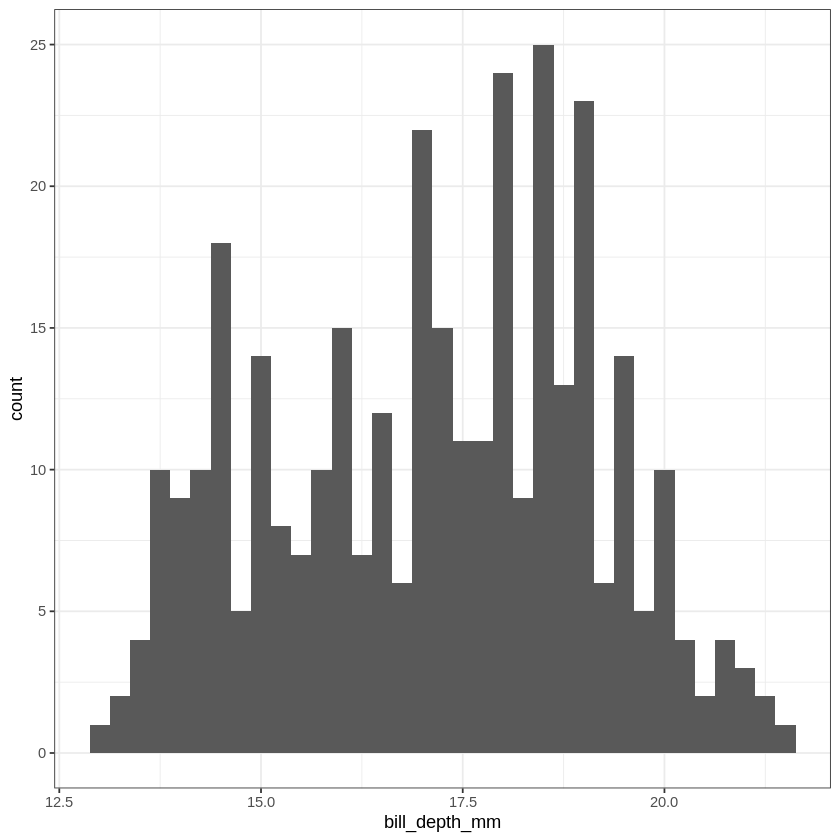

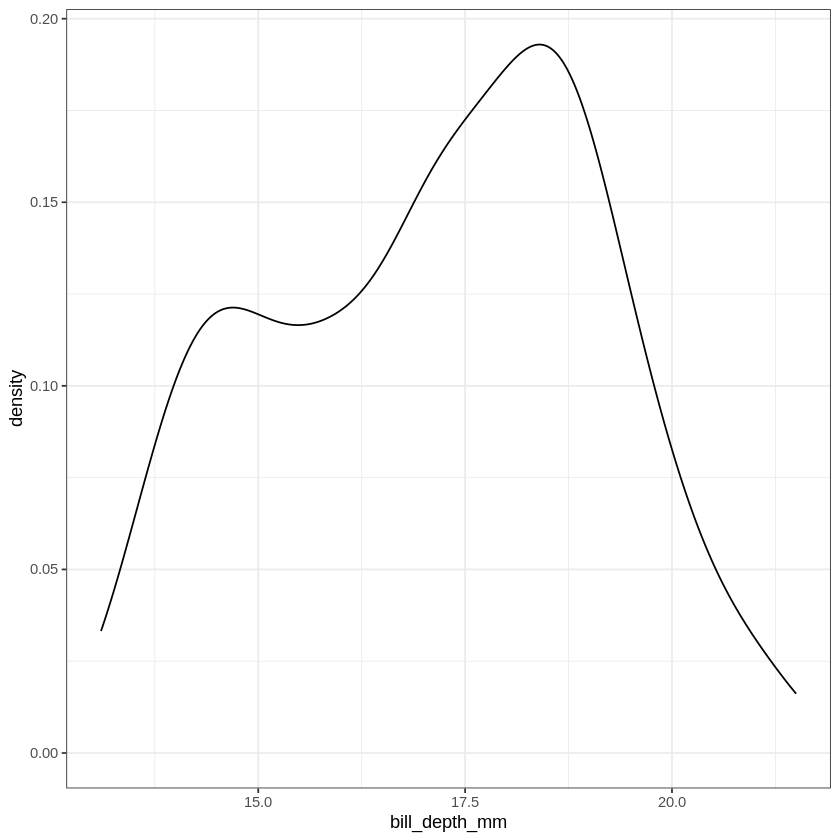

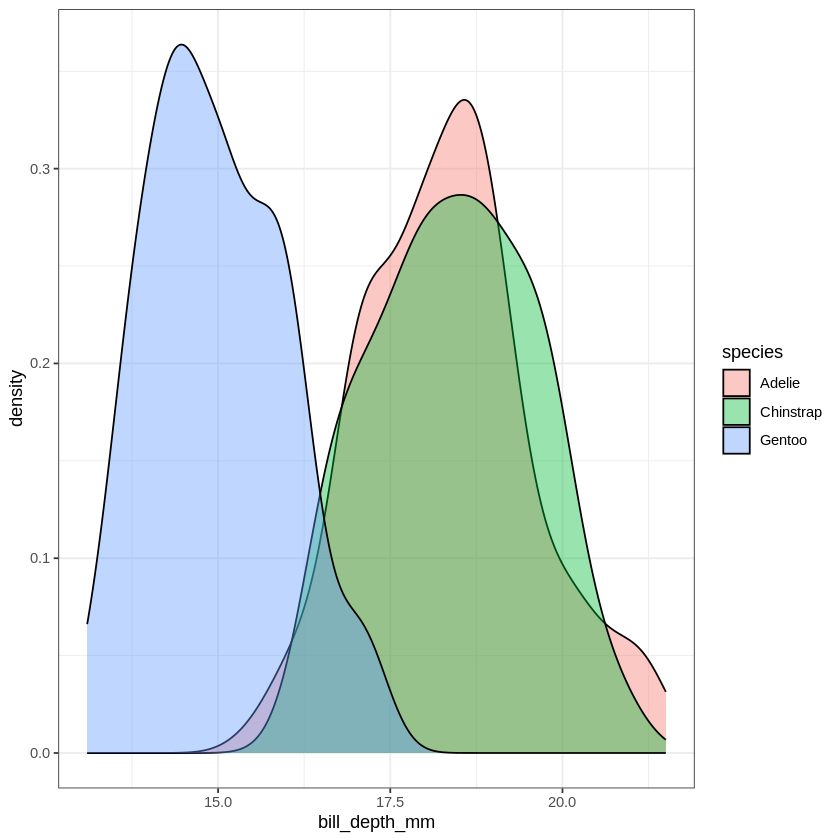

In [ ]:
# histogram plot for bill_depth_mm
ggplot(penguins, aes(x = bill_depth_mm)) +
  geom_histogram(binwidth = 0.25) +
  theme_bw()

# density plot for bill_depth_mm
ggplot(penguins, aes(x = bill_depth_mm)) +
  geom_density() +
  theme_bw()

# density plot for bill_depth_mm with each gender
ggplot(penguins, aes(x = bill_depth_mm, fill = species)) +
  geom_density(alpha = 0.4) + # alpha refers to the opacity of the geom element
  theme_bw()


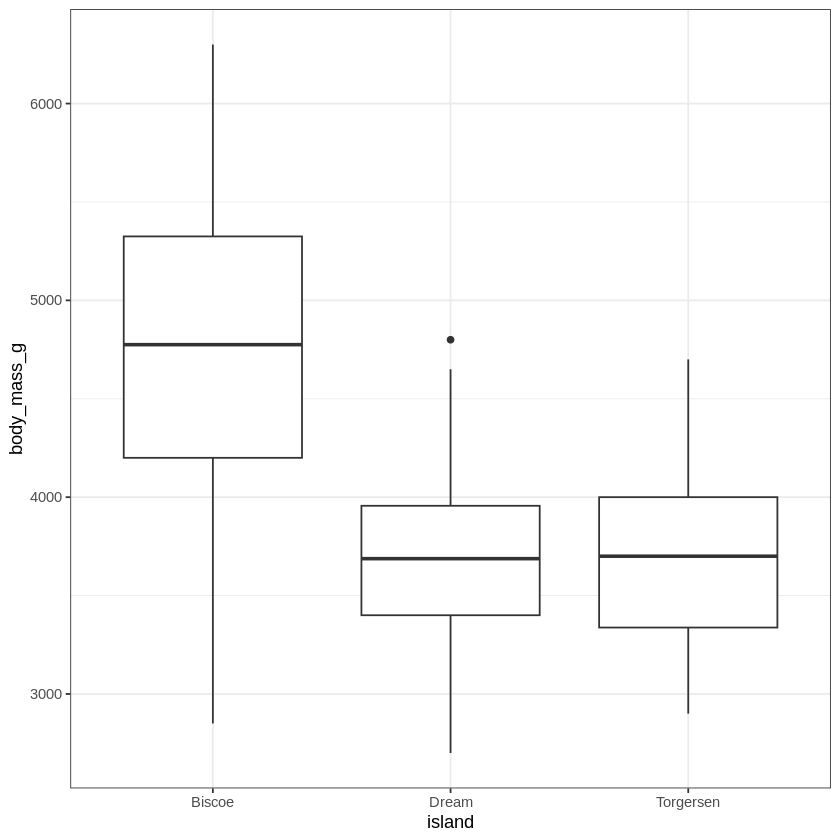

In [ ]:
# Use box plot to inspect penguins' boday mass across islands
ggplot(penguins, aes(x = island, y = body_mass_g)) +
  geom_boxplot() +
  theme_bw()

### **Exercise 2**

Create the following grahics:

1. A barplot for the counts of species subvided by island of which **the bars are not overlapped**.
2. A histogram plot for body_mass_g
3. A boxplot that explores the relationship between penguins'sex and body_mass_g **where the penguins' sex is the y-axis**.

In [ ]:
#@title Answer to exercise 2
ggplot(penguins, aes(x = species, fill = island)) +
  geom_bar( position = "dodge") +
  theme_bw()

ggplot(penguins, aes(x = body_mass_g)) +
  geom_histogram(binwidth = 100) +
  theme_bw()


penguins_nona = penguins %>% na.omit()
ggplot(penguins_nona, aes(x = sex, y = body_mass_g)) +
  geom_boxplot() +
  coord_flip() +
  theme_bw()



# dplyr for data manipulation

In the next part of the lab, we are working with the dataframe "flights" from the library "nycflights13".

In [ ]:
head(flights) # look at the first few rows of the dataframe

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [ ]:
help(flights) # read the dataset descripion

There are five functions in dplyr: select, filter, arrange, mutate and summarise. All of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names( without quotes).
3. The result is a new data frame.

## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [ ]:
names(flights)

In [ ]:
df <- select(flights, time_hour, carrier, flight, origin, dest, distance)
print(df)

##### **Pipe**

Because the first argument is a data frame and the output is a data frame, dplyr verbs work well with the pipe, %>% (or |>). The pipe takes the thing on its left and passes it along to the function on its right

In [ ]:
flights %>%
  select(time_hour, carrier, flight, origin, dest, distance) %>%  # select columns by name
  print() # print the resulted dataframe

In [ ]:
flights %>%
  select(carrier:distance) %>% # slice selecting all columns from carrier to distance
  print()

In [ ]:
flights %>%
  select( -c(year, month, day) ) %>% # do not show columns year, month, days
  print()

Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [ ]:
flights %>%
  rename(x = carrier) %>%
  print()

Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dataframe

In [ ]:
flights %>%
  select(carrier, tailnum, everything()) %>%
  print()

There are some helper functions for select():
    starts_with()
    ends_with()
    contains()
    
### Exercise 3.a:
Write code that wil have tailnum as the first column and the columns starting with the letter 'd' as the following columns.



In [ ]:
#@title Answer to exercise 3.a
flights %>%
  select(tailnum, starts_with('d')) %>%
  print()

## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [ ]:
flights %>%
  filter(carrier == 'UA') %>% # select only United Airline data records
  print()

Usually you want to store the newly subsetted data in memory.

In [ ]:
ua_flights = flights %>% filter(carrier == 'UA')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments.

In [ ]:
4 == 6
x = 6
x
x == 5


Use %in% if the filtering variable can take multiple values.

In [ ]:
 flights %>%
   filter(carrier %in% c('UA', 'AA', 'DL')) %>% # get only rows with these specific carriers
   print()

## Logical conditions

In [ ]:
summer_flights = flights %>% filter(month == 6 | month == 7 | month == 8)
# filtering for rows that satisfy one or all of the conditions

ua_december = flights %>% filter(carrier == 'UA' & month == 12)
# filtering for rows that satisfy both conditions

short_flights = flights %>% filter(air_time < 60)
# can do this because air_time is a numeric variable

In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [ ]:
x = 4

In [ ]:
x == NA
is.na(x)

This function can be used with filter() to remove the rows with NA values.

In [ ]:
flights_nona = flights %>% filter( !is.na(dep_time))

In [ ]:
print(dim(flights))
print(dim(flights_nona))

### Exercise 3.b

Write code using filter that selects all the rows of carrier 'AA' on the last day of month.

In [ ]:
#@title Answer to exercise 3.b
month31 = c(1, 3, 5, 7, 8, 10, 12)
month30 = c(4, 6, 9, 11)
month28 = c(2)

# use filter with complex conditions
flights %>%
  filter(carrier == 'AA') %>%
  filter( ( (month %in% month31) & (day == 31) ) |
          ( (month %in% month30) & (day == 30) ) |
          ( (month %in% month28) & (day == 28) ) ) %>%
  print()

## Arrange

Useful for ordering rows of the dataframe.

In [ ]:
flights %>%
  arrange(year, month, day, dep_time) %>%
  print()
# can be done since year, month, day, dep_time are numeric

In [ ]:
# arranging in the increasing order of year the descending order of month, day
flights %>%
  arrange(year, desc(month), desc(day))

Missing values are always sorted at the end:

In [ ]:
df = tibble(x = c(5, NA, 2))
df %>% arrange(x)

In [ ]:
df %>% arrange(desc(x))

### Exercise 3.c
Use arrange to sort flights dataset by descending order of the division of distance by air_time.

In [ ]:
#@title Answer to exercise 3.c

flights %>%
  arrange(desc(distance / air_time)) %>%
  print()

### Mutate

The role of mutate() is to add new columns that are calculated from the existing columns. By default, mutate() adds new columns on the right hand side of your dataset

In [ ]:
flights %>%
  mutate(speed = distance / air_time * 60) %>%
  print()

To add the variables to the left hand side2 use .before.

In [ ]:
flights %>%
  mutate(speed = distance / air_time * 60, .before = 1) %>%
  print()

If you only want to keep the new variables, use transmute()

In [ ]:
flights %>%
  transmute(speed = distance / air_time * 60) %>%
  print()

#### **if_else with mutate**

To create a new column which takes one value when a condition is TRUE and another value when it’s FALSE

In [ ]:
flights %>%
  mutate(
    status = if_else(
      is.na(arr_delay), "cancelled", "scheduled"),
    .keep = "used"
  ) %>%
  print()

#### **case_when()**

To use when there are more than two values.

In [ ]:
flights %>%
  mutate(
    status = case_when(
      is.na(arr_delay)      ~ "cancelled",
      arr_delay < -30       ~ "very early",
      arr_delay < -15       ~ "early",
      abs(arr_delay) <= 15  ~ "on time",
      arr_delay > 15        ~ "late",
      arr_delay > 60        ~ "very late",
    ),
    .keep = "used"
  ) %>%
  print()

### Exercise 3.d

Create the new column type_of_flight which can be "short-haul", "long-haul", "medium-haul". Short-haul is a flight whose air_time lasts anywhere from 30 minutes to 3 hours. Medium-haul is defined by flights lasting between 3-6 hours. And lastly, long-haul flights are those that extend beyond 6 hours. Note that you should remove all the rows with NA.

In [ ]:
#@title Answer to exercise 3.d

flights %>%
  filter(!is.na(air_time)) %>%
  mutate(
    type_of_flight = case_when(
      air_time <  180       ~ "short-haul",
      air_time <  360       ~ "medium-haul",
      air_time >= 360       ~ "long-haul",
    ),
    .keep = "used"
  ) %>% print()


## summarise()
Generally used in concert with group_by() function. This is the most important grouped operation which collapses each group to a single row. Group summaries are seen in many applications.

**count rows with n()**

In [ ]:
# count number of records for each carrier
flights %>%
  count(carrier, sort = TRUE) %>%
  print()

# An equivalent way using group_by and summarize()
flights %>%
  group_by(carrier) %>%
  summarize(
    n = n(),
  ) %>%
  arrange(desc(n)) %>%
  print()

**sum()**

In [ ]:
flights %>%
  group_by(carrier, tailnum) %>%
  summarize(miles = sum(distance)) %>% # count the miles traveled by each plane
  print()

**Minimum, maximum, and quantiles**

min() and max() will give you the largest and smallest values. Another powerful tool is quantile() which is a generalization of the median: quantile(x, 0.25) will find the value of x that is greater than 25% of the values.

Let's inspect the departure delay time for each day in flights dataset in more details.

In [ ]:
flights %>%
  group_by(year, month, day) %>%
  summarize(
    max = max(dep_delay, na.rm = TRUE), # max departure delay
    min = min(dep_delay, na.rm = TRUE), # max departure delay
    q5 = quantile(dep_delay, 0.05, na.rm = TRUE), # 5 percentile value of departure delay
    q95 = quantile(dep_delay, 0.95, na.rm = TRUE), # 95 percemntile of departure delay
    .groups = "drop"
) %>% print()

**Center and spread**

We often use mean() to summarize the center of a vector of values. Because the mean is the sum divided by the count, it is sensitive to even just a few unusually high or low values. An alternative is to use the median(), which finds a value that lies in the “middle” of the vector, i.e. 50% of the values is above it and 50% are below it.

Two commonly used summaries to measure the spread of data values are the standard deviation, sd(x), and the inter-quartile range, IQR(). IQR() is quantile(x, 0.75) - quantile(x, 0.25)

In [ ]:
# air time by each airplanes
flights %>%
  filter(!is.na(air_time)) %>%
  group_by(carrier, tailnum) %>%
  summarize(
    distance_mean = mean(air_time), # mean
    distance_median = median(air_time), # median
    distance_iqr = IQR(air_time), # IQR distance
    distance_sd = sd(air_time), # sd of distance
    .groups = "drop"
  ) %>%  print()

### Exercise 3.e

Which destinations show the greatest variation in air speed ? Air speed is defined as distance divided by air time (miles/hour).

In [ ]:
#@title Answer to exercise 3.e

flights_var =  flights %>%
    filter(!is.na(air_time) & !is.na(distance)) %>%
    mutate(air_speed = distance / air_time * 60) %>% # create the new column air_speed with mutate()
    group_by(dest) %>%
    summarise(
      speed_sd = sd(air_speed),
      speed_iqr = IQR(air_speed)
    )

flights_var %>% arrange(desc(speed_sd)) %>% head(3)
flights_var %>% arrange(desc(speed_iqr)) %>% head(3)

# OKC has the highest variation in term of air speed SD.
# HOU has the highest variation in term of air speed IQR.